# t-SNE using Scikit-Learn on MNIST Dataset


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings               #to avoid any warnings

warnings.filterwarnings('ignore')

#loading MNIST dataset in d
d=pd.read_csv('train.csv')
#seperating class label and pixel values
label=d['label']
d=d.drop('label',axis=1)

(images, dimension) :  (42000, 784)
(class_label, ) :  (42000,)
The class value is :  5


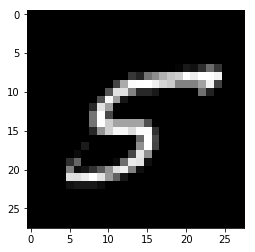

In [12]:
#shape of the dataset
print("(images, dimension) : ",d.shape)
print("(class_label, ) : ",label.shape)

#resize the row into 28x28
index=6788
#converting pandas dataframe to numpy array for reshape
np_array=d.iloc[index].values
image_data=np_array.reshape(28,28)

#showing the image on given index
plt.imshow(image_data,interpolation=None,cmap='gray')
print('The class value is : ',label[index])

In [13]:
#Data-preprocessing  =>  Column standarization(mean and std_dev to unit variance)
from sklearn.preprocessing import StandardScaler

std_data=StandardScaler().fit_transform(d)

print("Mean after column standardization on col 5 \n------------------\n",np.mean(std_data[6]))
print("std_dev after column standardization on col 5\n----------------\n",np.std(std_data[6]),end='\n\n')
print("Size :",std_data.shape)



Mean after column standardization on col 5 
------------------
 -0.12002731731261022
std_dev after column standardization on col 5
----------------
 0.6885617861705172

Size : (42000, 784)


We are using 10000 data points instead of 42000.
Checking with default model with step of 1000 and perplexity of 30

In [14]:
std_data=std_data[0:10000,:]
label=label[0:10000]

from sklearn.manifold import TSNE

#default model
#default perplexity =30
#default iteration =1000
#random_state=0 <-- indicate the output will be same always not randomized
model=TSNE(n_components=2)
tsne_data=model.fit_transform(std_data)




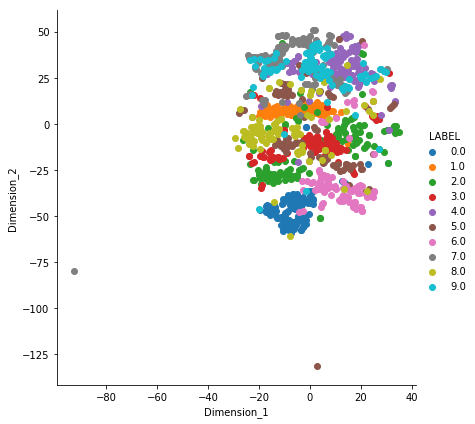

In [10]:
#attaching the label to the transformed data
tsne_data=np.vstack((tsne_data.T,label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dimension_1","Dimension_2","LABEL"))

sn.FacetGrid(tsne_df,hue="LABEL",size=6).map(plt.scatter,'Dimension_1','Dimension_2').add_legend()
plt.show()

Checking with step of 2000 and perplexity of 50

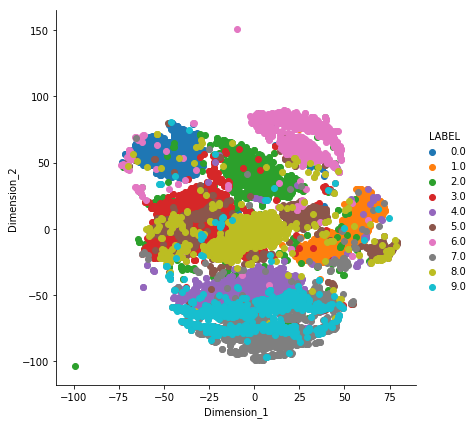

In [16]:
#checking with step of 2000 and perplexity of 50
model=TSNE(n_components=2,n_iter=2000,perplexity=50)

tsne_data=model.fit_transform(std_data)

tsne_data=np.vstack((tsne_data.T,label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dimension_1","Dimension_2","LABEL"))

sn.FacetGrid(tsne_df,hue="LABEL",size=6).map(plt.scatter,'Dimension_1','Dimension_2').add_legend()
plt.show()


Checking with step of 3000 and perplexity of 50

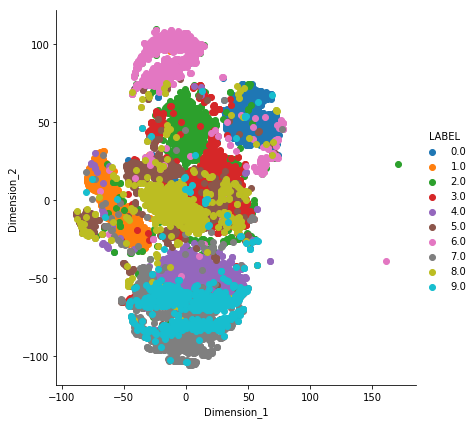

In [18]:
#checking with step of 3000 and perplexity of 50
model=TSNE(n_components=2,n_iter=3000,perplexity=50)

tsne_data=model.fit_transform(std_data)

tsne_data=np.vstack((tsne_data.T,label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dimension_1","Dimension_2","LABEL"))

sn.FacetGrid(tsne_df,hue="LABEL",size=6).map(plt.scatter,'Dimension_1','Dimension_2').add_legend()
plt.show()


Checking with step of 5000 and perplexity of 50

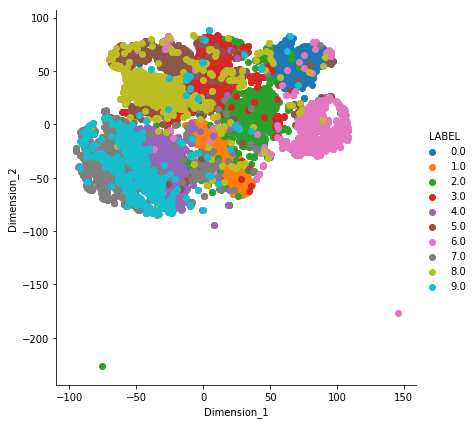

In [19]:
#checking with step of 3000 and perplexity of 50
model=TSNE(n_components=2,n_iter=5000,perplexity=50)

tsne_data=model.fit_transform(std_data)

tsne_data=np.vstack((tsne_data.T,label)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dimension_1","Dimension_2","LABEL"))

sn.FacetGrid(tsne_df,hue="LABEL",size=6).map(plt.scatter,'Dimension_1','Dimension_2').add_legend()
plt.show()

Note at perplexity of 50 we get the stable configuration and the scatter plot look same in step of 3000 and 5000 both